# Import

In [ ]:
! pip install scikit-plot

In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scikitplot as skplt
from umap import UMAP

# scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# scikit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load dataset

In [ ]:
 credit_card = pd.read_csv("/content/CC GENERAL.csv")

# Exploratory Data Analysis, Data Cleaning, and Preprocessing

In [ ]:
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#for values with 0 payments, set minimum payments as 0. 
val = credit_card.loc[((credit_card['MINIMUM_PAYMENTS'].isnull())&(credit_card['PAYMENTS']==0))].index
for i in val:
  credit_card.iloc[i,15] = 0

In [ ]:
# set the remaining missing values based on the median proportion of minimum payments to payments
mean_prop = credit_card['MINIMUM_PAYMENTS']/credit_card['PAYMENTS']
mean_prop = mean_prop.median()
credit_card.fillna(value={'MINIMUM_PAYMENTS':mean_prop*credit_card['PAYMENTS']},inplace=True)

In [ ]:
credit_card.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
credit_card.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

# Feature Enginnering

## StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(credit_card)
Xs = sc.transform(credit_card)

## KMeans

In [ ]:
#define the cluster
k3 = KMeans(n_clusters=3, init='random', n_init=5, random_state=109)

# fit the model
k3.fit(Xs)

# predict the cluster label

labels = k3.labels_

In [ ]:
k3.n_iter_

14

## PCA

In [ ]:
pca = PCA(0.9)
pca.fit(Xs)
pcs = pca.transform(Xs)

In [ ]:
pcs.shape

(8949, 10)

In [ ]:
comps = pcs[:, :2]
comps.shape

(8949, 2)

In [ ]:
pdata = pd.DataFrame(comps, columns=['pc1', 'pc2'])
pdata['label'] = labels

pdata.head(3)

,pc1,pc2,label
0,-1.684373,-1.070406,1
1,-1.132893,2.510277,2
2,0.968719,-0.384200,1


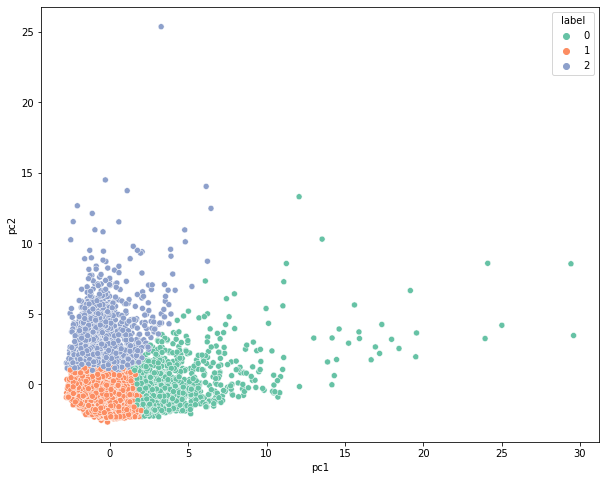

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="pc1", y="pc2", hue="label", data=pdata, legend="full", palette="Set2")

## TSNE

In [ ]:
# two step process - use PCA to reduce, then tsne for embeddings (2d)
pca.n_components_

10

In [ ]:
pcs.shape

(8949, 10)

In [ ]:
tsne = TSNE()
tsne.fit(pcs)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
te = tsne.embedding_

In [ ]:
te.shape

(8949, 2)

In [ ]:
tdata = pd.DataFrame(te, columns=["e1", "e2"])
tdata['label'] = labels

tdata.head(3)

,e1,e2,label
0,5.987278,-48.003979,1
1,55.309204,30.588970,2
2,-10.134512,37.966301,1


In [ ]:
tdata['label'].value_counts()

1    6125
2    1594
0    1230
Name: label, dtype: int64

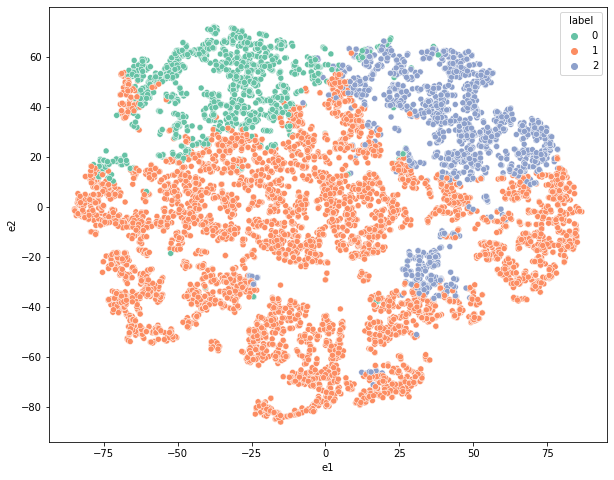

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", hue="label", data=tdata, legend="full", palette="Set2")

## UMAP

In [ ]:
u = UMAP(random_state=820, n_neighbors=10)
u.fit(Xs)
embeds = u.transform(Xs)

In [ ]:
embeds.shape

(8949, 2)

In [ ]:
umap_df = pd.DataFrame(embeds, columns=["x","y"])
umap_df['label'] = labels
umap_df.head(3)

,x,y,label
0,6.102334,5.978765,1
1,1.995295,1.582194,2
2,7.855958,-0.927674,1


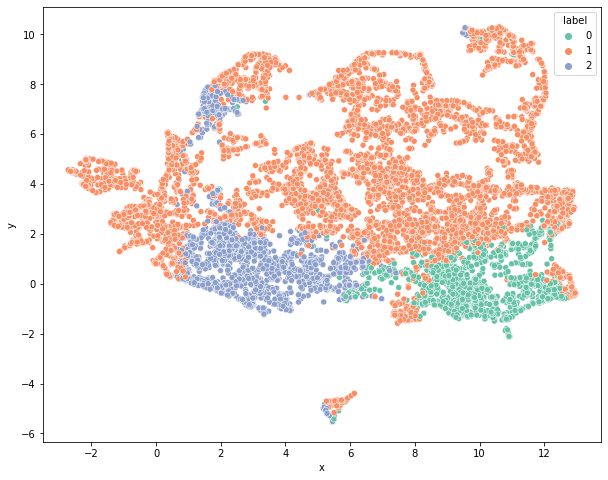

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="x", y="y", hue="label", data=umap_df, legend="full", palette="Set2")
plt.show()

********************************just for try, can ignore codes below*********************

## UMAP on PCA-reduced data

In [ ]:
pca = PCA()
pca.fit(Xs)
pcs = pca.transform(Xs)

In [ ]:
pcs.shape

(8949, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


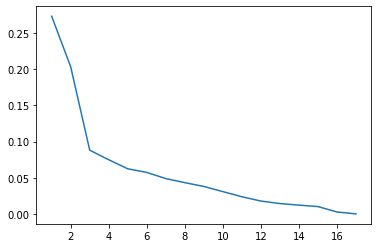

In [ ]:
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.show()

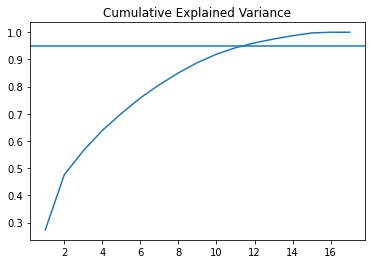

In [ ]:
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.95)
plt.show()

In [ ]:
p = pd.DataFrame(pcs)
p11 = p.iloc[:, :11]
p11.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.684373,-1.070406,0.478855,0.680368,0.045562,0.080250,0.818378,-0.018823,0.120263,-0.081165,-0.236516
1,-1.132893,2.510277,0.599923,-0.106867,0.680790,-1.090230,-0.382308,0.179647,0.671097,-0.782666,-0.869136
2,0.968719,-0.384200,0.096472,1.233078,-2.167638,-0.363996,-1.532738,-0.213697,-0.876035,0.002777,-0.762658
3,-0.897096,-0.017175,1.538053,1.011035,0.163213,-0.207154,-0.210181,-0.777590,-0.014850,0.386640,0.747340
4,-1.600549,-0.681908,0.351786,1.015182,-0.450080,0.084658,0.692916,0.252135,0.576544,-0.126760,-0.455498


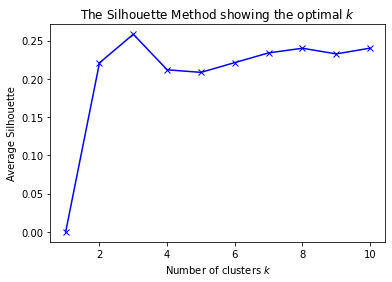

In [ ]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(p11)
    score = silhouette_score(p11, fitx.labels_)
    scores.append(score)

plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Silhouette Method showing the optimal $k$')
plt.show()

3 clusters:

In [ ]:
#define the cluster
k3_2 = KMeans(3)

# fit the model
k3_2.fit(p11)

# predict the cluster label
k3_2_labs = k3_2.predict(p11)

In [ ]:
u2 = UMAP(random_state=820, n_neighbors=10)
u2.fit(p11)
embeds2 = u2.transform(p11)

In [ ]:
embeds2.shape

(8949, 2)

In [ ]:
umap_df2 = pd.DataFrame(embeds2, columns=["x","y"])
umap_df2['label2'] = k3_2_labs
umap_df2.head(3)

,x,y,label2
0,3.988691,3.431666,1
1,7.246511,9.735783,0
2,1.393190,10.529171,1


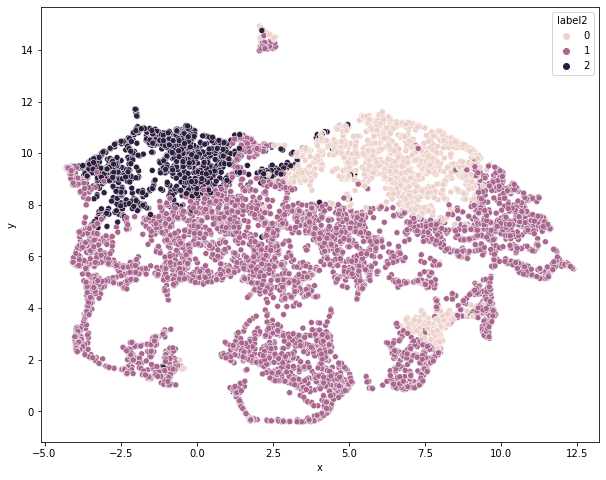

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="x", y="y", hue="label2", data=umap_df2, legend="full")
plt.show()

8 clusters:

In [ ]:
#define the cluster
k8 = KMeans(8)

# fit the model
k8.fit(p11)

# predict the cluster label
k8_labs = k8.predict(p11)

In [ ]:
u8 = UMAP(random_state=820, n_neighbors=10)
u8.fit(p11)
embeds8 = u8.transform(p11)

In [ ]:
embeds8.shape

(8949, 2)

In [ ]:
umap_df8 = pd.DataFrame(embeds8, columns=["x","y"])
umap_df8['label8'] = k8_labs
umap_df8.head(3)

,x,y,label8
0,3.988691,3.431666,2
1,7.246511,9.735783,0
2,1.393190,10.529171,3


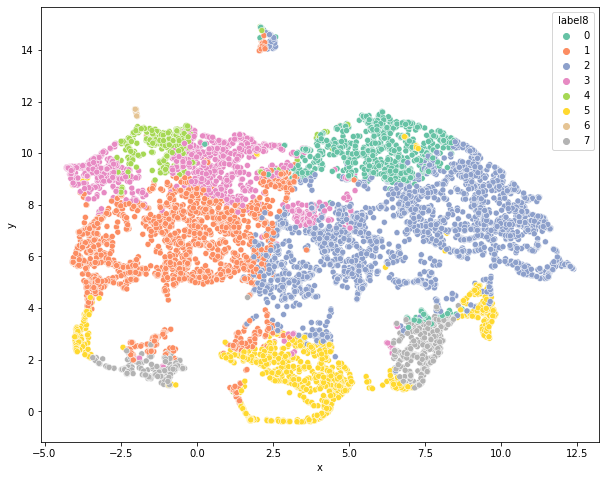

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="x", y="y", hue="label8", data=umap_df8, palette="Set2")
plt.show()